In [31]:
import numpy as np

img = np.load("/home/nics/Work/sp-sold2/assets/img/img_origin.npy")
warped_img = np.load("/home/nics/Work/sp-sold2/assets/img/img_warped.npy")
pts = np.load("/home/nics/Work/sp-sold2/assets/img/points_origin.npy")
warped_pts = np.load("/home/nics/Work/sp-sold2/assets/img/points_warped.npy")
h = np.load("/home/nics/Work/sp-sold2/assets/img/homo.npy")
from utils.superpoint import SuperPointFrontend
from skimage import color 
# print(warped_img.shape)
weights_path = "/home/nics/Work/SuperPointPretrainedNetwork/superpoint_v1.pth"
nms_dist = 4
conf_thresh = 0.015
nn_thresh = 0.7
cuda = True
fe = SuperPointFrontend(weights_path=weights_path,
                          nms_dist=nms_dist,
                          conf_thresh=conf_thresh,
                          nn_thresh=nn_thresh,
                          cuda=cuda)
grayim1 = color.rgb2gray(img).astype(np.float32)
grayim2 = warped_img
# print(grayim2.shape)
# print(grayim.shape)
pts1, desc1, _ = fe.run(grayim1)
pts2, desc2, _ = fe.run(grayim2)
print(pts2.shape, desc2.shape)

(3, 341) (1, 256, 64, 64)


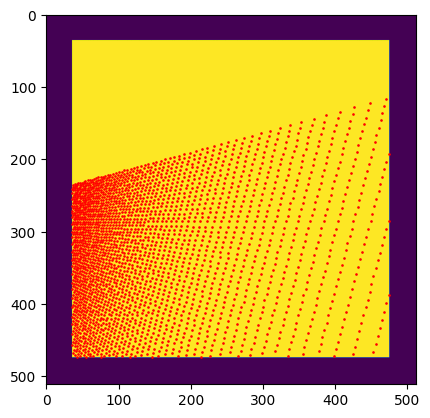

In [22]:
import matplotlib.pyplot as plt
import numpy as np
valid_mask1 = np.load("/home/nics/Work/sp-sold2/assets/img/valid_mask1.npy")
cells1 = np.load("/home/nics/Work/sp-sold2/assets/img/cells1.npy")

plt.imshow(valid_mask1)
def plot_pts(pts_list, indices=[0]):
    fig = plt.gcf()
    ax = fig.axes
    # print(len(ax), max(indices))
    # assert len(ax) > max(indices)
    axes = [ax[i] for i in indices]
    fig.canvas.draw()

    # Plot the lines and junctions
    for a, pts in zip(axes, pts_list):
        for i in range(pts.shape[0]):
            # print(pts[:,i])
            # p = pts[:, i]
            a.scatter(pts[i,1], pts[i,0], color="red", s=0.8)
plot_pts([cells1])

(2738, 2) (2729, 2)


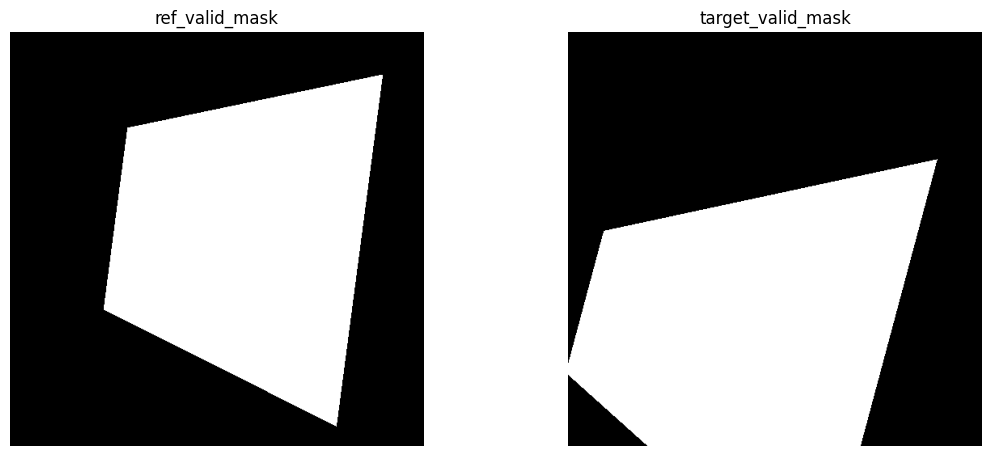

In [24]:
from sold2.misc.visualize_util import plot_images, plot_lines, plot_line_matches, plot_color_line_matches, plot_keypoints, plot_line_segments_from_segments
import numpy as np
import matplotlib.pyplot as plt
def plot_pts(pts_list, indices=[0]):
    fig = plt.gcf()
    ax = fig.axes
    # print(len(ax), max(indices))
    # assert len(ax) > max(indices)
    axes = [ax[i] for i in indices]
    fig.canvas.draw()

    # Plot the lines and junctions
    for a, pts in zip(axes, pts_list):
        for i in range(pts.shape[0]):
            # print(pts[:,i])
            # p = pts[:, i]
            a.scatter(pts[i,1], pts[i,0], color="red", s=0.8)
ref_valid_mask = np.load("/home/nics/Work/sp-sold2/assets/img/ref_valid_mask.npy")[0]
target_valid_mask = np.load("/home/nics/Work/sp-sold2/assets/img/target_valid_mask.npy")[0]

ref_cells = np.load("/home/nics/Work/sp-sold2/assets/img/ref_cells.npy")[0]
target_cells = np.load("/home/nics/Work/sp-sold2/assets/img/target_cells.npy")[0]

# print(valid_mask[300])
# mask_img = warped_img.copy()
# mask_img[valid_mask] = 255
# plt.imshow(valid_mask)
plot_images([ref_valid_mask, target_valid_mask], ['ref_valid_mask', 'target_valid_mask'])
# print(cells)
# 
ref_cells = ref_cells.astype(np.int32)
target_cells = target_cells.astype(np.int32)

# mask = []
# valid_cells = []
# for i in range(len(cells)):
#      if valid_mask[cells[i,0], cells[i,1]]:
#          valid_cells.append(cells[i])
# # print(mask[500:800])
# # cells = cells[mask]
# valid_cells = np.array(valid_cells)
# print(valid_cells)
ref_cells_mask = ref_valid_mask[ref_cells[:,0], ref_cells[:,1]].astype(bool)
target_cells_mask = target_valid_mask[target_cells[:,0], target_cells[:,1]].astype(bool)
# ref_cells_mask = valid_mask[warped_coor_cells[:,0], warped_coor_cells[:,1]].astype(bool)
ref_cells = ref_cells[ref_cells_mask]
target_cells = target_cells[target_cells_mask]
# valid_cells = cells[cells_mask]
print(ref_cells.shape, target_cells.shape)
# plot_pts([ref_cells, target_cells],[0,1])